$\href{https://docs.scipy.org/doc/scipy/reference/stats.html}{SciPy.Stats} \textbf{ - функции распределения, статистические тетсы, статистики, функции корреляции и прочее}$

$\Large\textbf{Библиотеки}$

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as st 
import matplotlib.pylab as plt

import re
import itertools
from zlib import crc32
from itertools import combinations

# критерий стюдента для независимых выборок
from  statsmodels.stats.weightstats import ttest_ind

# пакет для работы с множественным тестированием
from statsmodels.stats.multitest import multipletests

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [ ]:
!pip install cryptorandom permute arch

In [ ]:
! pip install permutation_test

In [ ]:
from statsmodels.stats.descriptivestats import sign_test
from permute.core import one_sample, two_sample
from arch.bootstrap import IIDBootstrap

from permutation_test import permutationtest

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/Intelligent-Systems-Phystech/psad/master/hometask/sem1/y.csv', header = None)

$\textbf{Нахождение оценок выборочного среднего, выборочной медианы, выборочной моды и несмещенного стандартного отклонения. Поиск k - ой порядковой статистики.}$ 

In [ ]:
x = data[0].values
print('mean = {:.3f}'.format(np.mean(x))) # среднее значение
print('median = {:.3f}'.format(np.median(x))) # медиана
print('std = {:.3f}'.format(np.std(x, ddof = 1))) # несмещенная оценка стандартного отклонения

mean = -1.429
median = -1.000
std = 143.807


In [ ]:
print('mode = {}'.format(st.mode(x))) # мода
print('maximum_mode = {:.3f}'.format(data[0].mode().max())) # максимальная мода
print('number_of_modes = {}'.format(len(data[0].mode()))) # количество мод

mode = ModeResult(mode=array([-163.]), count=array([33]))
maximum_mode = 80.000
number_of_modes = 7


In [ ]:
k = int(input())
print('stat_{} = {}'.format(k, np.partition(x, k)[k - 1])) # k-ая порядковая статистика

42
stat_42 = -248.0


$\textbf{Тесты для проверки данных на нормальность. Если $p\_value > 0.05$, то данные можно считать нормально распределёнными   ($p\_value$ - второе значение в скобках)}$



In [ ]:
print('Харке-Берра:', st.jarque_bera(x)) # тест Харке-Берра 
print('Шапиро-Уилка:', st.shapiro(x)) # тест Шапиро-Уилка 
print('Д\'Агостино:', tuple(st.normaltest(x))) # ещё один тест (основа на тестах Д'Агостино и Пирсона)

Харке-Берра: (0.764718512847885, 0.6822499065111163)
Шапиро-Уилка: (0.9503185749053955, 0.37195128202438354)
Д'Агостино: (0.7564689439811965, 0.6850698521408862)


$\Large\textbf{Проверка парметрических гипотез}$

In [ ]:
n, k = 55, 50 # число положительных и отрицательных исходов соответственно 
print(st.binom_test((n, k), p = 0.5, alternative = 'two-sided')) # биномиальный тест (H0: p_real = p, H1: p_real <!=> p)

0.6964676629916754


In [ ]:
st.ttest_1samp(x, popmean = 0) # t-test для среднего одной выборки (H0: meam = popmean, H1: mean <!=> popmean)

Ttest_1sampResult(statistic=-0.013237598130900889, pvalue=0.9895762465333544)

In [ ]:
st.ttest_1samp(x, popmean = 0) # Calculate the T-test for the mean of ONE group of scores.
st.ttest_ind(a = x, b = x) # Calculate the T-test for the means of two independent samples of scores.
st.ttest_ind_from_stats() # T-test for means of two independent samples from descriptive statistics.
st.ttest_rel(a = x, b = x) # Calculate the t-test on TWO RELATED samples of scores, a and b.

$\Large\textbf{Проверка непараметрических гипотез}$


In [ ]:
x = np.array([-0.10807709,  0.07356522, -0.739063  , -0.64162977,  0.1828638 ,
         0.59814749,  0.92453191, -2.03833198, -0.17707878,  0.43352974,
         1.33710666,  0.01993165, -0.6180032 , -0.81091398, -0.20807483,
        -0.31187699, -0.18038264,  0.58779878,  1.11981533,  0.5101736 ])

In [ ]:
print(tuple(st.wilcoxon(x))) # одновыборочный критерий знаковых рангов Вилкоксона (проверяет гипотезу med(X) = m0 с альтернативой med(X) <!=> m0)
print(sign_test(x, mu0=0.0)) # одновыборочный критерий знаков (проверяет гипотезу med(X) = m0 с альтернативой med(X) <!=> m0) med(X) - медиана
print(one_sample(x-0.5, alternative ='two-sided')) # одновыборочный перестановочный критерий (проверяет гипотезу EX = m0 с альтернативой EX <!=> m0) EX - матожидание
print(two_sample(x = x, y = x, alternative ='two-sided')) # двухвыборочный перестановочный критерий (проверяется гипотеза о равенстве средних EX = EY) !!!но это не точно

(105.0, 1.0)
(0.0, 1.0)
(0.007639923600763992, -0.502298404)
(0.997570024299757, 0.0)


In [ ]:
print('Критерий знаковых рангов Вилкоксона:\nT = {}\np-value = {}\n'.format(*tuple(st.wilcoxon(x))))
print('Одновыборочный критерий занков:\nT = {}\np-value = {}\n'.format(*sign_test(x, mu0=0.0)))
print('Одновыборочный перестановочный критерий:\np-value = {}\nT = {}\n'.format(*one_sample(x-0.5, alternative ='two-sided')))
print('Двухвыборочный перестановочный критерий:\np-value = {}\nT = {}\n'.format(*two_sample(x = x, y = x, alternative ='two-sided')))

Критерий знаковых рангов Вилкоксона:
T = 105.0
p-value = 1.0

Одновыборочный критерий занков:
T = 0.0
p-value = 1.0

Одновыборочный перестановочный критерий:
p-value = 0.007459925400745993
T = -0.502298404

Двухвыборочный перестановочный критерий:
p-value = 0.997150028499715
T = 0.0



In [ ]:
bs = IIDBootstrap(x) 
bound = list(map(lambda x: round(x[0], 2), bs.conf_int(np.mean, 10000, method='basic')))
print('left_bound = {}\nright_bound = {}'.format(*bound)) # левая и правая границы доверительного интервала для среднего выборки 
# IIDBootstrap(x).conf_int(np.mean, 10000, method='basic') - краткая запись

left_bound = -0.32
right_bound = 0.33


In [ ]:
print(tuple(st.mannwhitneyu(x = x, y = x))) # критерий Манна-Уитни-Вилкоксона 
#(непараметрический тест с нулевой гипотезой о том, что распределение, лежащее в основе выборки x , совпадает с распределением, лежащим в основе выборки y)

(200.0, 1.0)


In [ ]:
print(tuple(st.ansari(x = x, y = x))) # критерий Ансари-Брэдли (проверяет гипотезу о равенстве дисперсий DX = DY, при этом выборки должны быть независимы и с равными медианами)

(210.0, 1.0)


$\Large\textbf{Множественное тестирование гипотез}$

In [ ]:
alpha, m, m0, n = 0.05, 50, 15, 20

$\textbf{График зависимости мощности для разных поправок}$

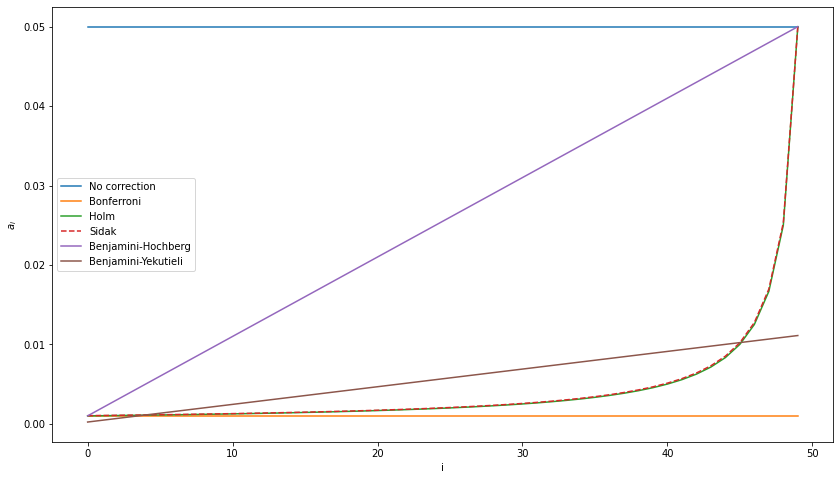

In [ ]:
plt.figure(figsize = (14, 8))

# Без поправок
plt.plot([0, m - 1], [alpha] * 2, label='No correction')

# Поправка Бонферрони
bonferroni = alpha / m
plt.plot([0, m - 1], [bonferroni] * 2, label='Bonferroni')

# Поправка Холма
holm = alpha / np.arange(m, 0, -1)
plt.plot(holm, label='Holm')

# Поправка Шидака
sidak = 1 - np.power((1. - alpha),  1. / np.arange(m, 0, -1))
plt.plot(sidak, label='Sidak', ls='--')

# Поправка Бенджамини-Хохберга
ecdffactor = np.arange(1, m + 1)/float(m)
bh = alpha * ecdffactor
plt.plot(range(m), bh, label='Benjamini-Hochberg' )

# Поправка Бенджамини-Иекутиели 
cm = np.sum(1. / np.arange(1, m+1)) 
ecdffactor = ecdffactor / cm
by = alpha * ecdffactor
plt.plot(range(m), by, label='Benjamini-Yekutieli ' )

plt.xlabel('i')
plt.ylabel('$a_i$')
plt.legend(loc='best')

plt.show()

$\Large\textbf{Пример}$


In [ ]:
data  = np.array([[-0.78016423, -0.05794395, -1.56448117, -0.19131988,  0.35092962], # данные взяты из 4 домашки
       [-0.07393965,  0.79302274, -2.86375015,  0.27323111,  0.60159556],
       [ 0.66501952, -0.11157752, -1.44342137, -0.36060409, -0.04000901],
       [-0.98396412, -0.3118918 , -0.23761939,  1.57012522,  0.67823942],
       [-0.76280268, -1.82203434,  2.06406946,  0.91361085, -0.57504194],
       [-0.75053382,  0.40691147,  0.94787637,  1.56196317,  1.62026852],
       [-0.55076698, -0.06405085, -1.2380808 ,  0.27364983, -0.15901419],
       [-0.09714098,  0.41562372, -1.65759994, -1.71844765, -1.99610138],
       [-0.87537025, -0.9314073 , -0.42886738, -0.86843595, -0.57136779],
       [-0.55149711, -0.65931456, -1.16515511,  0.84928689,  0.56550101],
       [-1.34448672, -0.54235698, -2.21254583,  0.88555513,  0.0914802 ],
       [ 0.1953067 , -0.40199438, -0.46697482,  1.25258596, -0.75670996],
       [ 0.77207322, -0.85915118, -1.41268512,  0.47804466, -3.24227987],
       [-0.2103062 ,  1.02705194,  0.06819997,  0.40975861,  1.90363223],
       [ 0.05023571,  0.50441717,  0.35397455, -1.0760035 , -0.68646229],
       [-0.45946823, -0.27288011,  0.2970795 ,  1.00553359, -0.06511064],
       [-0.71895054,  0.96094817, -1.37950252,  0.44859303, -0.65436672],
       [-0.67058597, -1.04513997,  0.17400058,  1.1279794 , -1.22462557],
       [ 0.0359328 ,  0.03321613, -2.70320725, -0.37014808, -0.24865978],
       [ 0.30678536, -0.70038021,  0.15882213,  1.72393382, -1.2176401 ],
       [ 0.50068506,  1.26540511, -1.28250246,  1.13667595,  0.6441605 ],
       [-0.88547642,  0.00436348, -1.87612401,  0.85230092,  2.30783348],
       [-1.82049298,  1.07342269, -0.29852324,  0.52577144,  0.1041235 ],
       [-1.49452239, -0.87820003, -1.35058167, -0.64794859,  2.56692216],
       [-0.48523929,  0.10763517, -0.49475102, -0.78225748, -1.06875827],
       [-0.12045912, -1.02002467,  0.26835721,  1.00946451,  1.59054726],
       [-0.97764814, -0.94948381,  0.4020277 , -1.36742329,  0.41384625],
       [ 0.4295789 ,  1.68527888,  0.19599163,  0.9512955 ,  2.07993258],
       [ 0.09758205, -0.44581054, -1.0731338 ,  0.82083413, -1.31540366],
       [ 0.28247416,  0.71278489, -1.43997431, -0.3105102 ,  0.7622867 ]])

In [ ]:
new_data = [data[:, i] for i in range(data.shape[1])]

In [ ]:
def test(data):
    rejections, p_values = 0, []
    for x, y in combinations(data, 2):
        p_value = st.ttest_ind(x, y)[1]
        p_values.append(p_value)
        rejections += p_value <= 0.05
    return rejections, p_values

In [ ]:
methods = ['bonferroni', 'holm', 'sidak', 'holm-sidak', 'fdr_bh', 'fdr_by']
p_values = test(new_data)[1]
for method in methods:

  reject_array, p_vals_corr, *_ = multipletests(p_values, method = method)
  print('Rejections with {} = {}\n'.format(method, sum(reject_array)))
  # print('p values corrected with {} = {}\n'.format(method, p_vals_corr)) # печатает массив скорректированных p-value


Rejections with bonferroni = 2

Rejections with holm = 2

Rejections with sidak = 2

Rejections with holm-sidak = 2

Rejections with fdr_bh = 4

Rejections with fdr_by = 2



$\Large\textbf{Attention!!}$ \\
$\textbf{Здесь не проверялись условия применимости методов Бенджамини-Хохберга, Шидака и Холма-Шидака - просто приведён пример их использования}$

$\textbf{Далее: $p\_values - $ значения уровней значимости, полученные без применения поправок}$

$\textbf{Поправка Бонферрнони. Нет ограничений на использование. Даёт минимальную мощность}$


In [ ]:
p_holm = multipletests(p_values, method='bonferroni')[1]

$\textbf{Метод Холма. Нет ограничений на использование. Обеспечивает бОльшую мощность, чем метод Бонферрони}$

In [ ]:
p_holm = multipletests(p_values, method='holm')[1]

$\textbf{Метод Шидака. Обеспечивает $FWER \le \alpha$ только если статистики $T_i$  независимые или выполнено условие: $P(T_1 \le t_1,...,T_m \le t_m) \ge \prod\limits_{i = 1}^{m} P(T_i \le t_i) \;\;\; \forall t_1,...,t_m $}$

In [ ]:
p_sidak = multipletests(p_values, method='Sidak')[1]

$\textbf{Метод Шидака-Холма. Обеспечивает $FWER \le \alpha$ только если статистики $T_i$  независимые.}$

In [ ]:
p_holm_sidak = multipletests(p_values, method='Holm-Sidak')[1]

$\textbf{Метод Бенджамини-Хохберга. Обеспечивает $FDR \le \alpha$ при условии, что статистики $T_i$ независимые или выполнено условие: $P(X \in D|T_i = x)$ не убывает по $x \; \forall i \in M_0$}$
$\textbf{$D$ - произвольное возрастающее множество. $M_0$ - индексы верных гипотез}$

$\textbf{Если X из нормального распределения, то метод можно использовать.}$

$\textbf{Метод обеспечивает наибольшую мощность.}$

In [ ]:
p_bh = multipletests(p_values, method='fdr_bh')[1]

$\textbf{Метод Бенджамини-Иекутиели. Нет ограничений на использование.}$
$\textbf{Метод неулучшаем при отсутствии информации о зависимости между статистиками.}$

In [ ]:
p_by = multipletests(p_values, method='fdr_by')[1]